In [2]:
import os
os.chdir("C:/Users/star9/Downloads")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("processed.cleveland.data")
data.columns = ['age', 'sex', 'cp', 'treastbps', 'chol', 
              'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'goal']
data

,age,sex,cp,treastbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
data.info()
# ca와 thal 열에서 ?로 값이 매겨진 경우가 있는 것을 확인 나머지 열에는 결측치 x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        302 non-null    float64
 1   sex        302 non-null    float64
 2   cp         302 non-null    float64
 3   treastbps  302 non-null    float64
 4   chol       302 non-null    float64
 5   fbs        302 non-null    float64
 6   restecg    302 non-null    float64
 7   thalach    302 non-null    float64
 8   exang      302 non-null    float64
 9   oldpeak    302 non-null    float64
 10  slope      302 non-null    float64
 11  ca         302 non-null    object 
 12  thal       302 non-null    object 
 13  goal       302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [5]:
#ca, thal 타입을 실수로 변환, ? 값은 결측치로 나타나도록 변경
data['thal'] = pd.to_numeric(data['thal'], errors='coerce')
data['ca'] = pd.to_numeric(data['ca'], errors='coerce')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'treastbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'goal'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

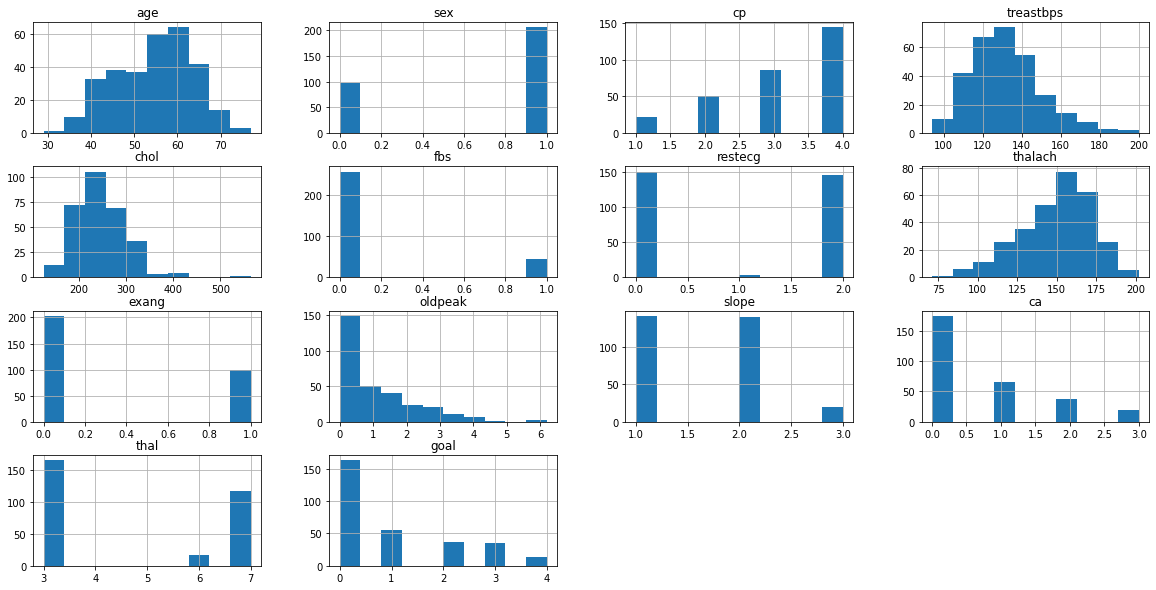

In [6]:
data.hist(figsize=(20,10))
#범주형 변수의 종류가 많으며 연속형 변수의 경우 분포가 균일해 정규화가 필요하지 않은 것으로 판단됩니다.

In [7]:
# 다항분류를 용이하게 하기 위해 타겟을 세 가지 수준으로 바꿔서 진행했습니다.
data['goal'] = data['goal'].apply(lambda x: 0 if x ==0 else (1 if x<3 else 2))

In [8]:
#data의 크기가 크지 않아 결측치를 드롭하지 않고 쓸 수 있고, feature importance를 확인할 수 있는 xgboost을 선택했습니다
#데이터 자체가 분포가 균일하게 잘 되어있어 정규화가 필요하지 않은 모델이 더 성능이 좋을 것이라 판단했습니다.
#중요도가 높은 몇몇 변수에 대한 시각화를 해보고 분석해볼 예정입니다.
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics

X=data.iloc[:, :-1]
y=data['goal']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
data_dim=xgb.DMatrix(data=X, label=y)
xg_reg=xgb.XGBClassifier()
xg_reg.fit(X_train, y_train)
pred_test=xg_reg.predict(X_test)
accuracy_score(y_test, pred_test)
#정확도로 미루어보아 과적합 문제가 있을 것으로 생각됩니다. gridsearch를 통해 초모수 탐색이 필요할 것으로 보입니다

0.6373626373626373

In [9]:
from sklearn.model_selection import GridSearchCV
param ={'max_depth':range(5,9), 'min_child_weight':range(1,3), 'gamma':[i/10.0 for i in range(3,6)],  'colsample_bytree':[i/10.0 for i in range(4,7)],
       'subsample':[i/100.0 for i in range(40,60)]}
xgsearch=GridSearchCV(estimator=xgb.XGBClassifier(),param_grid=param,
                      scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
xgsearch.fit(X_train,y_train)
xgsearch.best_params_, xgsearch.best_score_

({'colsample_bytree': 0.6,
  'gamma': 0.4,
  'max_depth': 7,
  'min_child_weight': 1,
  'subsample': 0.55},
 -0.3743796109993293)

In [10]:
xg_reg=xgb.XGBClassifier(learning_rate =0.1, n_estimators=300, max_depth=7, min_child_weight=1,
    gamma=0.4, subsample=0.53, colsample_bytree=0.6, objective= 'multi:softmax')

In [11]:
xg_reg.fit(X_train, y_train)
pred_train=xg_reg.predict(X_train)
pred_test=xg_reg.predict(X_test)
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))
#target 1의 경우에서 혼동이 많은 것으로 확인 0인 경우와 2인 경우는 서로 혼동된 경우가 없다

1.0
0.6923076923076923
[[44  4  0]
 [ 6 14  2]
 [ 0 16  5]]


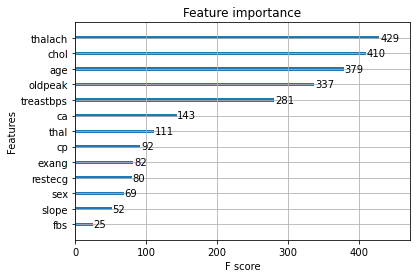

In [12]:
# thalach, are, chol 등이 중요도가 높은 것으로 보임
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize']=[5,5]
plt.show()